# Single Sideband Signals Analysis

Click "Run All" when running the notebook for the first time.

**Note 1:** When taking Fourier transform, in most cases, only the magnitude spectrum is of interest because it shows the shape of the transform, and which frequencies are present. 

**Note 2:** When taking the Fourier transform using the FFT function in any software, FFT needs to be scaled. The reason for this explained [in this blog.](https://sites.psu.edu/charlesammon/2017/03/09/how-to-determine-fft-scaling-with-matlab/) 

**Note 2.1:** For periodic signals, the FFT needs to be scaled by the length of the time array `n = len(t)`, probably because the signal is continuous over the entire time array.

**Note 2.2:** For aperiodic signals, the FFT needs to be scaled by time step of the time array `dt = t[1]-t[0]`, probably because the signal only exists for a finite portion of the time array. 

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

# Define a generic unit step function
def u(t):
    x = np.zeros(len(t))
    # tt keeps track of the value of t while the loop iterates
    # tt is equivalent to t[i]
    for i, tt in enumerate(t):
        if tt > 0:
            x[i] = 1.0
    return x

# Define function for creating a rectangular pulse
# where tau = pulse width and 
# the pulse is active over -tau/2 <= t <= tau/2.
def rect(t,tau):
    x = np.zeros(len(t))
    for i, tt in enumerate(t):
        if (np.abs(tt)>tau/2):
            x[i] = 0
        else:
            x[i] = 1
    return x

# Define a simulated delta function using step functions
def delta(t):
    x = np.zeros(len(t))
    # Td is the pulse width set equal to the time step
    Td = t[1]-t[0]
    # The amplitude is set to 1/Td, so that area under
    # the pulse is unity.
    x = (1/Td)*(u(t)-u(t-Td))
    return x  

# Define a signum function
def sgn(f):
    x = np.zeros(len(f))
    a = 0
    for i, ff in enumerate(f):
        if ff>0:
            x[i] = np.exp(-a*f[i])
        if ff<0:
            x[i] = -np.exp(a*f[i])
    return x

# Define Fourier coefficients array
n = np.arange(0,50)     # Create an integer multiple array

# Create time axis
t = np.linspace(-3,3,2048)

# Create the frequency axis
dt = t[1]-t[0]
N = len(t)
# The fftshift function will center the 0th frequency.
freq = np.fft.fftshift(np.fft.fftfreq(N,dt)) 

## Single sideband modulation (SSB)

### Hilbert transform

It is a filter that shifts the phase of all frequency components by $-\pi/2$. Its transfer function is defined as
$$
H(f) = -j\,\mathrm{sgn}(f)
$$
where the signum function is defined as
$$
\mathrm{sgn}(f) = \begin{cases}
& 1,\ & f>0\\
& 0,\ & f=0\\
& -1,\ & f<0
\end{cases}
$$

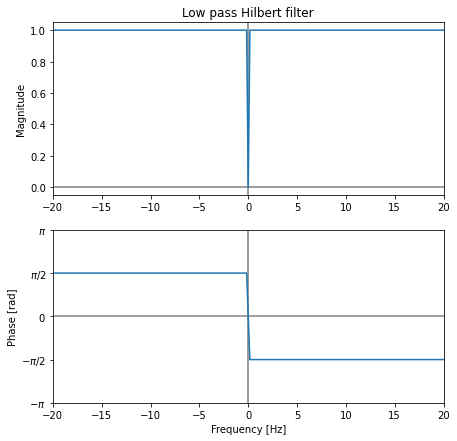

In [35]:
# Define a low pass Hilbert filter
H_f = -1j*sgn(freq)

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Low pass Hilbert filter')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.abs(H_f))
plt.ylabel('Magnitude')
plt.xlim(-20,20)

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(freq,np.angle(H_f))
plt.ylabel('Phase [rad]')
plt.xlim(-20,20)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 

plt.xlabel('Frequency [Hz]')
plt.show()


### Message signal
Let the baseband (message) signal, $m(t)$ be given by
$$
m(t) = \cos(2\pi 1t)\ -\ 0.4\cos(2\pi 2t) +\  0.8\cos(2\pi 3t)
$$
where $W=3\,\mathrm{Hz}$ is the highest frequency component of the message signal.

#### Fourier transform of message signal
The Fourier transform of the message signal can be written as
$$
\begin{align*}
M(f) &= \dfrac{1}{2}\delta(f\pm 1) - \dfrac{0.4}{2}\delta(f\pm 2) + \dfrac{0.8}{2}\delta(f\pm 3)\\
\\
M(f) &= 0.5\,\delta(f\pm 1) + 0.2\,e^{\pm j\pi}\delta(f\pm 2) + 0.4\,\delta(f\pm 3)
\end{align*}
$$

Max[m(t)]= 2.124999637704327
Min[m(t)]= -3.9999979390281726


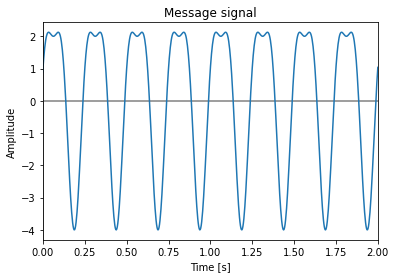

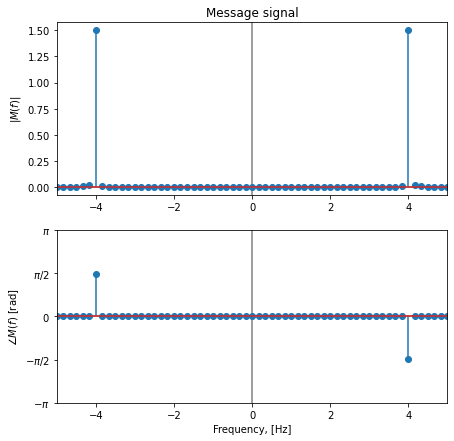

In [36]:
# Define the message signal
m_t = 3*np.sin(2.0*np.pi*4*t)+1*np.cos(2.0*np.pi*8*t)
W = 8

print('Max[m(t)]=',np.max(m_t))
print('Min[m(t)]=',np.min(m_t))

# Plot the signal
plt.title('Message signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,m_t)
plt.xlim(0,2)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

# Determine FFT
M_f = np.fft.fftshift(np.fft.fft(m_t)/N)

# Determine phase only where amplitude is non-zero
M_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(M_f[i])>0.1:
        M_f_phase[i] = np.angle(M_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Message signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(M_f))
plt.xlim(-5,5)
plt.ylabel('$|M(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,M_f_phase)
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{M}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

### Hilbert transform of the message signal
The Hilbert transform of the message signal can be calculated by,
$$
\begin{align*}
\hat{M}(f) &= M(f)\,H(f)\\
&=  \pm j\,0.5\,\delta(f\pm 1)  \pm j \,0.2\,e^{\pm j\pi}\,\delta(f\pm 2)  \pm j\,0.4\,\delta(f\pm 3)]\\
&= 0.5\,e^{\pm j\pi/2}\,\delta(f\pm 1) + 0.2\,e^{\mp j\pi/2}\,\delta(f\pm 2) + 0.4\,e^{\pm j\pi/2}\,\delta(f\pm 3)
\end{align*}
$$

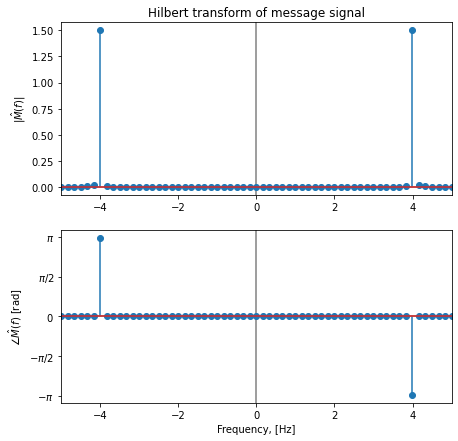

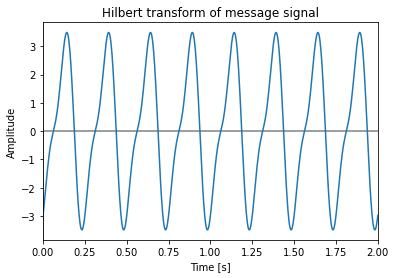

In [37]:
# Determine Hilbert transform of message signal
M_hat_f = M_f*H_f

# Determine phase only where amplitude is non-zero
M_hat_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(M_hat_f[i])>0.1:
        M_hat_f_phase[i] = np.angle(M_hat_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Hilbert transform of message signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(M_hat_f))
plt.xlim(-5,5)
plt.ylabel('$|\hat{M}(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,M_hat_f_phase)
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{\hat{M}}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

# Take inverse Fourier transform
m_hat_t = np.real(np.fft.ifft(np.fft.ifftshift(M_hat_f))*N)
m_hat = (-3)*np.cos(2.0*np.pi*4*t)+1*np.sin(2.0*np.pi*8*t)

# Plot the signal
plt.title('Hilbert transform of message signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,m_hat_t)
#plt.plot(t,m_hat)
plt.xlim(0,2)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

### Analytic signals
An analytic signal for positive frequencies is defined as
$$
a_{p}(t) = \dfrac{1}{2}\left[m(t) + j\,\hat{m}(t)\right]
$$
In the frequency domain,
$$
\begin{align*}
A_{p}(f) &= \dfrac{1}{2}\left[M(f) + j\,\hat{M}(f)\right]\\
&=\dfrac{1}{2}\left[M(f) + j(H(f)M(f))\right]\\
&=\dfrac{1}{2}\left[M(f) + j(-j\,\mathrm{sgn}(f)M(f))\right]\\
&= \dfrac{1}{2}\left[M(f) - j^{2}\mathrm{sgn}(f)M(f)\right]\\
A_{p}(f) &= \dfrac{M(f)}{2}[1+\mathrm{sgn}(f)]
\end{align*}
$$
Since
$$
\mathrm{sgn}(f) = \begin{cases}
& 1,\ & f>0\\
& 0,\ & f=0\\
& -1,\ & f<0
\end{cases}
$$
This implies that
$$
A_{p}(f) = \begin{cases}
& M(f),\ & f>0\\
& 0,\ & f<0
\end{cases}
$$

Similarly, an analytic signal for negative frequencies is defined as
$$
a_{n}(t) = \dfrac{1}{2}\left[m(t) - j\,\hat{m}(t)\right]
$$
whose Fourier transform will be
$$
\begin{align*}
A_{n}(f) &= \dfrac{1}{2}\left[M(f) - j\,\hat{M}(f)\right]\\
&=\dfrac{1}{2}\left[M(f) - j(H(f)M(f))\right]\\
&=\dfrac{1}{2}\left[M(f) - j(-j\,\mathrm{sgn}(f)M(f))\right]\\
&= \dfrac{1}{2}\left[M(f) + j^{2}\mathrm{sgn}(f)M(f)\right]\\
A_{n}(f) &= \dfrac{M(f)}{2}[1-\mathrm{sgn}(f)]\\
\\
A_{n}(f) &= \begin{cases}
& 0,\ & f>0\\
& M(f),\ & f<0
\end{cases}
\end{align*}
$$

For the given message signal, the Fourier transform of the positive analytic signal is given as
$$
\begin{align*}
A_{p}(f) = 0.5\,\delta(f-1)+0.2\,e^{-j\pi/2}\delta(f-2)+0.4\,\delta(f-3)
\end{align*}
$$
and the Fourier transform of the negative analytic signal is given as
$$
\begin{align*}
A_{n}(f) = 0.5\,\delta(f+1)+0.2\,e^{j\pi/2}\delta(f+2)+0.4\,\delta(f+3)
\end{align*}
$$

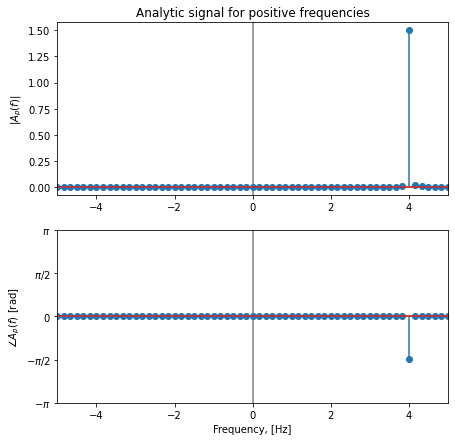

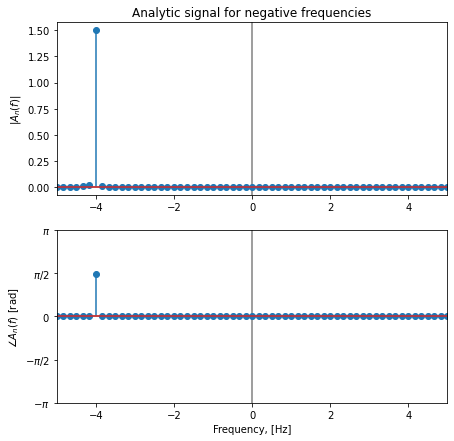

In [38]:
# Define analytic signal for positive frequencies
a_p_t = 0.5*(m_t + 1j*m_hat_t)

# Calculate FFT
A_p_f = np.fft.fftshift(np.fft.fft(a_p_t)/N)

# Determine phase only where amplitude is non-zero
A_p_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(A_p_f[i])>0.1:
        A_p_f_phase[i] = np.angle(A_p_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Analytic signal for positive frequencies')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(A_p_f))
plt.xlim(-5,5)
plt.ylabel('$|A_{p}(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,A_p_f_phase)
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{A_{p}}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

# Define analytic signal for negative frequencies
a_n_t = 0.5*(m_t - 1j*m_hat_t)

# Calculate FFT
A_n_f = np.fft.fftshift(np.fft.fft(a_n_t)/N)

# Determine phase only where amplitude is non-zero
A_n_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(A_n_f[i])>0.1:
        A_n_f_phase[i] = np.angle(A_n_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Analytic signal for negative frequencies')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(A_n_f))
plt.xlim(-5,5)
plt.ylabel('$|A_{n}(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,A_n_f_phase)
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{A_{n}}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

### Modulate the negative analytic signal with a carrier
#### Lower single sideband signal
The lower single sideband signal (LSB) signal is obtained when the negative analytic signal is modulated by the carrier.
$$
S_{LSB}(f) = \dfrac{A_{c}}{2}\left[A_{n}(f+f_{c})+A_{n}(f-f_{c})\right]
$$
where
$$
\begin{align*}
A_{n}(f-f_{c}) &= \dfrac{1}{2}\left[M(f-f_{c})-j\,\hat{M}(f-f_{c})\right]\\
\\
A_{n}(f+f_{c})&= \dfrac{1}{2}\left[M(f+f_{c})+j\,\hat{M}(f+f_{c})\right]
\end{align*}
$$
Therefore,
$$
\begin{align*}
S_{LSB}(f) &= \dfrac{A_{c}}{4}\left[M(f-f_{c})-j\,\hat{M}(f-f_{c})+M(f+f_{c})+j\,\hat{M}(f+f_{c})\right]\\
\\
&= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] - \dfrac{A_{c}}{4}\left[j\,\hat{M}(f-f_{c})-j\,\hat{M}(f+f_{c})\right]\\
\\
&= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] - \dfrac{A_{c}}{4}\left[\dfrac{-1}{j}\hat{M}(f-f_{c})+\dfrac{1}{j}\hat{M}(f+f_{c})\right]\\
\\
S_{LSB}(f) &= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] + \dfrac{A_{c}}{4j}\left[\hat{M}(f-f_{c})-\hat{M}(f+f_{c})\right]
\end{align*}
$$
Taking the Fourier inverse gives the upper sideband modulated signal in time domain,
$$
s_{LSB}(t) = \dfrac{A_{c}}{2}m(t)\,\cos(2\pi f_{c}t) + \dfrac{A_{c}}{2}\hat{m}(t)\,\sin(2\pi f_{c}t)
$$

Thus, for the given signal
$$
\begin{align*}
s_{LSB}(t) &= \dfrac{1}{2}\left(\cos(2\pi 1t)-0.4\cos(2\pi 2t)+0.8\cos(2\pi 3t)\right)\cos(2\pi 10t)\\ 
&+ \dfrac{1}{2}\left(\sin(2\pi 1t)-0.4\sin(2\pi 2t)+0.8\sin(2\pi 3t)\right)\sin(2\pi 10t)\\
\\
&= 0.5\,\cos(2\pi 1t)\cos(2\pi 10t)-0.2\,\cos(2\pi 2t)\cos(2\pi 10t)+0.4\,\cos(2\pi 3t)\cos(2\pi 10t)\\
&+ 0.5\,\sin(2\pi 1t)\sin(2\pi 10t)+0.2\,\sin(2\pi 2t)\sin(2\pi 10t)+0.4\,\sin(2\pi 3t)\sin(2\pi 10t)\\
\\
&= 0.5\,\cos(2\pi(10-1)t)-0.2\,\cos(2\pi (10-2)t)+0.4\,\cos(2\pi (10-3)t)\\
s_{LSB}(t) &= 0.5\,\cos(2\pi 9t)-0.2\,\cos(2\pi 8t)+0.4\,\cos(2\pi 7t)
\end{align*}
$$
Thus, its Fourier spectrum will be
$$
\begin{align*}
S_{LSB}(f) &= \dfrac{0.5}{2}\,\delta(f\pm 9)+\dfrac{0.2}{2}\,e^{\pm j\pi}\delta(f\pm 8)+\dfrac{0.4}{2}\,\delta(f\pm 7)\\
S_{LSB}(f) &= 0.25\,\delta(f\pm 9)-0.1\,e^{\pm j\pi}\delta(f\pm 8)+0.2\,\delta(f\pm 7)
\end{align*}
$$

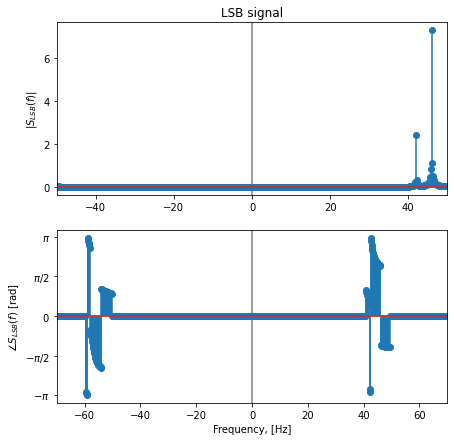

In [48]:
# Define the carrier signal
A_c = 10
fc = 50
c_t = A_c*np.cos(2.0*np.pi*fc*t)

# Create LSB modulated signal
s_LSB_t = a_n_t*c_t

# Calculate FFT
S_LSB_f = np.fft.fftshift(np.fft.fft(s_LSB_t)/N)

# Determine phase only where amplitude is non-zero
S_LSB_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(S_LSB_f[i])>0.05:
        S_LSB_f_phase[i] = np.angle(S_LSB_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('LSB signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(S_LSB_f))
plt.xlim(-50,50)
plt.ylabel('$|S_{LSB}(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,S_LSB_f_phase)
plt.xlim(-70,70)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{S_{LSB}}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

### Modulate the positive analytic signal with a carrier
#### Upper single sideband signal
The upper single sideband signal (USB) signal is obtained when the positive analytic signal is modulated by the carrier.
$$
S_{USB}(f) = \dfrac{A_{c}}{2}\left[A_{p}(f+f_{c})+A_{p}(f-f_{c})\right]
$$
where
$$
\begin{align*}
A_{p}(f-f_{c}) &= \dfrac{1}{2}\left[M(f-f_{c})+j\,\hat{M}(f-f_{c})\right]\\
\\
A_{p}(f+f_{c})&= \dfrac{1}{2}\left[M(f+f_{c})-j\,\hat{M}(f+f_{c})\right]
\end{align*}
$$
Therefore,
$$
\begin{align*}
S_{USB}(f) &= \dfrac{A_{c}}{4}\left[M(f-f_{c})+j\,\hat{M}(f-f_{c})+M(f+f_{c})-j\,\hat{M}(f+f_{c})\right]\\
\\
&= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] + \dfrac{A_{c}}{4}\left[j\,\hat{M}(f-f_{c})-j\,\hat{M}(f+f_{c})\right]\\
\\
&= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] + \dfrac{A_{c}}{4}\left[\dfrac{-1}{j}\hat{M}(f-f_{c})+\dfrac{1}{j}\hat{M}(f+f_{c})\right]\\
\\
S_{USB}(f) &= \dfrac{A_{c}}{4}\left[M(f-f_{c})+M(f+f_{c})\right] - \dfrac{A_{c}}{4j}\left[\hat{M}(f-f_{c})-\hat{M}(f+f_{c})\right]
\end{align*}
$$
Taking the Fourier inverse gives the upper sideband modulated signal in time domain,
$$
s_{USB}(t) = \dfrac{A_{c}}{2}m(t)\,\cos(2\pi f_{c}t) - \dfrac{A_{c}}{2}\hat{m}(t)\,\sin(2\pi f_{c}t)
$$

Thus, for the given signal
$$
\begin{align*}
s_{USB}(t) &= \dfrac{1}{2}\left(\cos(2\pi 1t)-0.4\cos(2\pi 2t)+0.8\cos(2\pi 3t)\right)\cos(2\pi 10t)\\ 
&- \dfrac{1}{2}\left(\sin(2\pi 1t)-0.4\sin(2\pi 2t)+0.8\sin(2\pi 3t)\right)\sin(2\pi 10t)\\
\\
&= 0.5\,\cos(2\pi 1t)\cos(2\pi 10t)-0.2\,\cos(2\pi 2t)\cos(2\pi 10t)+0.4\,\cos(2\pi 3t)\cos(2\pi 10t)\\
&- 0.5\,\sin(2\pi 1t)\sin(2\pi 10t)+0.2\,\sin(2\pi 2t)\sin(2\pi 10t)+0.4\,\sin(2\pi 3t)\sin(2\pi 10t)\\
\\
&= 0.5\,\cos(2\pi(10+1)t)-0.2\,\cos(2\pi (10+2)t)+0.4\,\cos(2\pi (10+3)t)\\
s_{USB}(t) &= 0.5\,\cos(2\pi 11t)-0.2\,\cos(2\pi 12t)+0.4\,\cos(2\pi 13t)
\end{align*}
$$
Thus, its Fourier spectrum will be
$$
\begin{align*}
S_{USB}(f) &= \dfrac{0.5}{2}\,\delta(f\pm 11)+\dfrac{0.2}{2}\,e^{\pm j\pi}\delta(f\pm 12)+\dfrac{0.4}{2}\,\delta(f\pm 13)\\
S_{USB}(f) &= 0.25\,\delta(f\pm 11)-0.1\,e^{\pm j\pi}\delta(f\pm 12)+0.2\,\delta(f\pm 13)
\end{align*}
$$

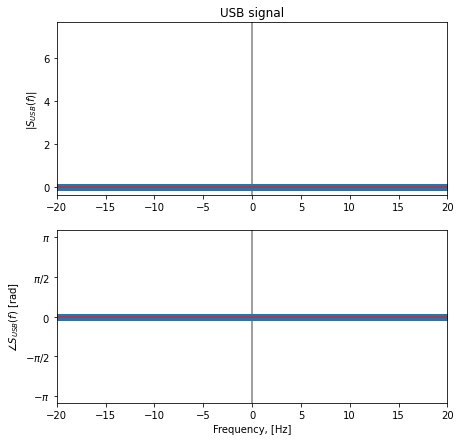

In [40]:
# Create USB modulated signal
s_USB_t = a_p_t*c_t

# Calculate FFT
S_USB_f = np.fft.fftshift(np.fft.fft(s_USB_t)/N)

# Determine phase only where amplitude is non-zero
S_USB_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(S_USB_f[i])>0.05:
        S_USB_f_phase[i] = np.angle(S_USB_f[i])

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('USB signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(S_USB_f))
plt.xlim(-20,20)
plt.ylabel('$|S_{USB}(f)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,S_USB_f_phase)
plt.xlim(-20,20)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 
plt.ylabel('$\\angle{S_{USB}}(f)$ [rad]')

plt.xlabel('Frequency, [Hz]')
plt.show()

### Ideal lowpass lower sideband (LSB) filter
Consider a lowpass equivalent of the lower sideband filter defined as
$$
H_{LP-LSB}(f) = 1-\mathrm{sgn}(f),\ |f|<W
$$

Consider a lowpass equivalent of the lower sideband filter defined as
$$
H_{LP-USB}(f) = 1+\mathrm{sgn}(f),\ |f|<W
$$

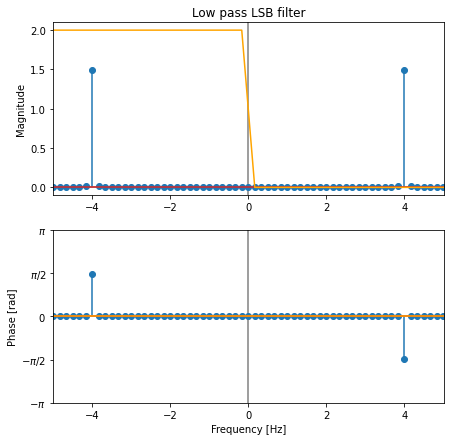

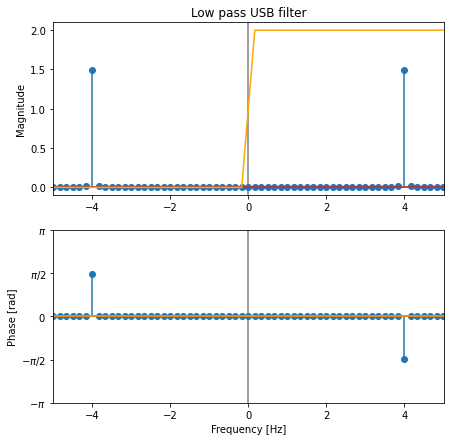

In [41]:
# Ideal lowpass LSB filter
H_LPL_f = (1-sgn(freq))*(u(freq+W)-u(freq-W))

# Message signal through the lowpass LSB filter
M_LPL_f = M_f*H_LPL_f

# Determine phase only where amplitude is non-zero
M_LPL_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(M_LPL_f[i])>0.1:
        M_LPL_f_phase[i] = np.angle(M_LPL_f[i])


# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Low pass LSB filter')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(M_f))
plt.plot(freq,np.abs(H_LPL_f),color='orange')
plt.ylabel('Magnitude')
plt.xlim(-5,5)

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,M_f_phase)
plt.plot(freq,np.angle(H_LPL_f),color='orange')
plt.ylabel('Phase [rad]')
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 

plt.xlabel('Frequency [Hz]')
plt.show()

# Ideal lowpass USB filter
H_LPU_f = (1+sgn(freq))*(u(freq+W)-u(freq-W))

# Message signal through the lowpass LSB filter
M_LPU_f = M_f*H_LPU_f

# Determine phase only where amplitude is non-zero
M_LPU_f_phase = np.zeros(len(freq))
for i in range(len(freq)):
    if np.abs(M_LPU_f[i])>0.1:
        M_LPU_f_phase[i] = np.angle(M_LPU_f[i])


# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('Low pass USB filter')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,np.abs(M_f))
plt.plot(freq,np.abs(H_LPU_f),color='orange')
plt.ylabel('Magnitude')
plt.xlim(-5,5)

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.stem(freq,M_f_phase)
plt.plot(freq,np.angle(H_LPU_f),color='orange')
plt.ylabel('Phase [rad]')
plt.xlim(-5,5)
my_yticks = ['$-\pi$','$-\pi/2$','$0$','$\pi/2$','$\pi$']   
plt.yticks([-np.pi,-np.pi/2,0,np.pi/2,np.pi],my_yticks) 

plt.xlabel('Frequency [Hz]')
plt.show()


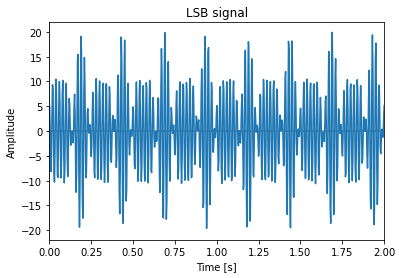

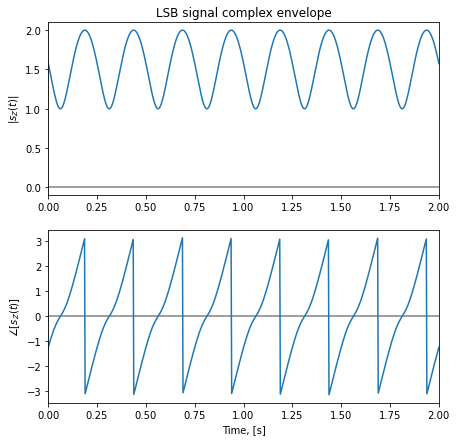

In [42]:
s_lsb_t = np.real(np.fft.ifft(np.fft.ifftshift(S_LSB_f))*N)

a_lsb_t = np.abs(0.5*(m_t+1j*m_hat))
theta_lsb_t = np.angle(0.5*(m_t+1j*m_hat))

# Plot the signal
plt.title('LSB signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_lsb_t)
plt.xlim(0,2)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('LSB signal complex envelope')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,a_lsb_t)
plt.xlim(0,2)
plt.ylabel('$|s_{Z}(t)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,theta_lsb_t)
plt.xlim(0,2)
plt.ylabel('$\\angle{[s_{Z}(t)]}$')

plt.xlabel('Time, [s]')
plt.show()

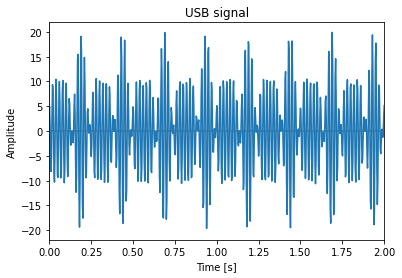

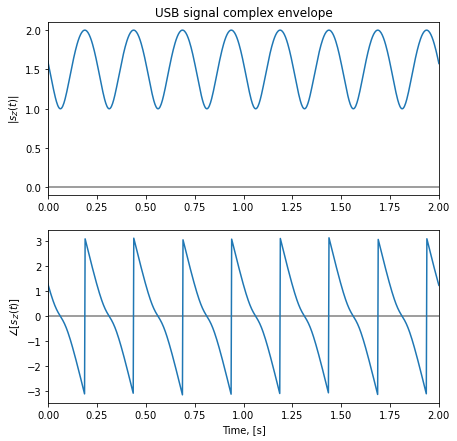

In [43]:
s_usb_t = np.real(np.fft.ifft(np.fft.ifftshift(S_USB_f))*N)

a_usb_t = np.abs(0.5*(m_t-1j*m_hat))
theta_usb_t = np.angle(0.5*(m_t-1j*m_hat))

# Plot the signal
plt.title('USB signal')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,s_usb_t)
plt.xlim(0,2)
plt.ylabel('Amplitude')
plt.xlabel('Time [s]')
plt.show()

# Plot the magnitude spectrum
plt.figure(figsize=(7,7))
plt.subplot(211)
plt.title('USB signal complex envelope')
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,a_usb_t)
plt.xlim(0,2)
plt.ylabel('$|s_{Z}(t)|$')

plt.subplot(212)
plt.axvline(color='gray')
plt.axhline(color='gray')
plt.plot(t,theta_usb_t)
plt.xlim(0,2)
plt.ylabel('$\\angle{[s_{Z}(t)]}$')

plt.xlabel('Time, [s]')
plt.show()